In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sns.set()

In [20]:
class Vector:

    def magnitudeVector(self, vector):
        """This is also called magnitude of vector like |vector| or L2 Norm ||vector||"""
        OA = 0
        for i in range(len(vector)):
            OA += (vector[i]** 2)
        # OA = (OA) ** 0.5
        return OA
    

    def angleBetweenVectors(self, vector1, vector2):
        dot_product = np.dot(vector1, vector2)
        magnitude_product = np.linalg.norm(vector1) * np.linalg.norm(vector2)
        cosine_angle = dot_product / magnitude_product

        # Calculate the angle in radians
        angle_rad = np.arccos(np.clip(cosine_angle, -1.0, 1.0))

        return np.degrees(angle_rad)


    
    def twoDimPlot(self, *vectors):
    
        plt.figure(figsize=(5, 3))
        for i, vector in enumerate(vectors):
            x1, y1 = vector
            color = plt.cm.viridis(i / len(vectors))  # Use a colormap to get different colors
            plt.scatter(x1, y1, marker='+', color=color)
    
                # Draw a line from the origin to each point using quiver
            plt.quiver(0, 0, x1, y1, angles='xy', scale_units='xy', scale=1, color=color, width=0.005)
    
            plt.annotate(f'|{x1}|\n|{y1}|', xy=(x1, y1), xytext=(x1 + 0.1, y1 + 0.1))
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        # plt.title('Scatter Plot of Vectors')
    
            # Show the plot after all vectors have been plotted
        plt.show()

    
    def scalerVectorOperation(self, scaler, vector, operation=None, plot=False):

        new_vector = []

        if operation == '+':
            for i in range(len(vector)):
                new_vector.append(vector[i] + scaler)
        elif operation == '-':
            for i in range(len(vector)):
                new_vector.append(vector[i] - scaler)
        elif operation == '*':
            for i in range(len(vector)):
                new_vector.append(vector[i] * scaler)
        elif operation == '/':
            for i in range(len(vector)):
                new_vector.append(vector[i] / scaler)

        if plot==True:
                self.twoDimPlot(vector, new_vector)
            
        return new_vector

    
    def scalerScalerOperation(self, vector1, vector2, operation=None, plot=False):
        new_vector = []

        if len(vector1) != len(vector2):
            return "Length of two vectors is not same"
            
        for i in range(len(vector1)):
            if operation == '+':
                new_vector.append(vector1[i] + vector2[i])
            elif operation == '-':
                new_vector.append(vector1[i] - vector2[i])
            elif operation == '*':
                new_vector.append(vector1[i] * vector2[i])
            elif operation == '/':
                new_vector.append(vector1[i] / vector2[i])
                
        if plot==True:
                self.twoDimPlot(vector1, vector2, new_vector)

        return new_vector

    def dotProduct(self, vector1, vector2):
        dot_prod = 0

        if len(vector1) != len(vector2):
            return "Length of two vectors is not same"

        for i in range(len(vector1)):
            dot_prod += vector1[i] * vector2[i]

        return dot_prod


    def crossProduct(self, vector1, vector2):

        cross_prod = []

        if len(vector1) != len(vector2):
            return "Length of two vectors is not same"

        if len(vector1) < 3:

            vector1.append(0)
            vector2.append(0)

        for i in range(len(vector1)):
           cross_prod.append((vector1[(i + 1) % 3] * vector2[(i + 2) % 3]) - (vector1[(i + 2) % 3] * vector2[(i + 1) % 3]))
            
        return cross_prod


    def projectionVector(self, vector1, vector2, in_term=None, plot=False):

        projection = []

        dot_prod = self.dotProduct(vector1, vector2)
        magnitude_vector1 = self.magnitudeVector(vector1)
        magnitude_vector2 = self.magnitudeVector(vector2)
        if in_term == 'second':

            projection = self.scalerVectorOperation(scaler=dot_prod / magnitude_vector2, vector=vector2, operation='*')

        elif in_term == 'first':

            projection = self.scalerVectorOperation(scaler=dot_prod / magnitude_vector1, vector=vector1, operation='*')

        if plot==True:
                self.twoDimPlot(vector1, vector2, projection)
            
        return vector1, vector2, projection

In [21]:
v = Vector()

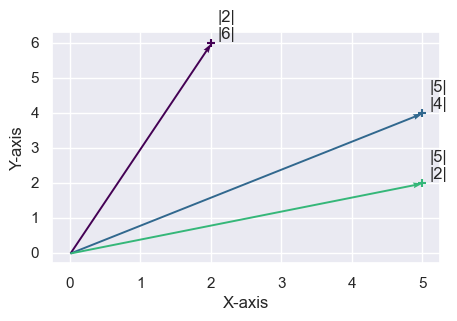

In [22]:
v.twoDimPlot([2, 6], [5, 4], [5, 2])

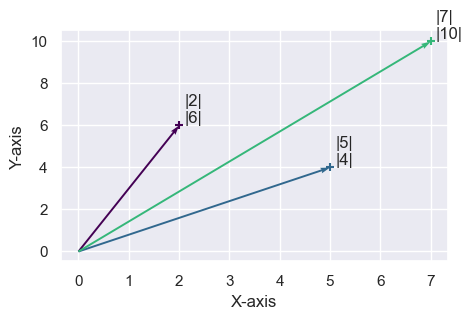

[7, 10]

In [25]:
v.scalerScalerOperation([2, 6], [5, 4], operation='+', plot=True)

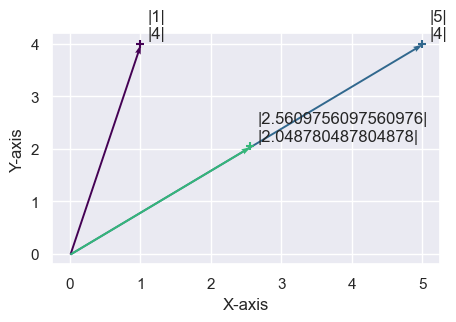

([1, 4], [5, 4], [2.5609756097560976, 2.048780487804878])

In [28]:
v.projectionVector([1, 4], [5, 4], in_term='second', plot=True)